In [ ]:
"""
Collect images from Google Drive
"""
from logging import basicConfig, INFO
from everywhereml.data import ImageDataset

base_folder = 'drive/MyDrive/line_types'
basicConfig(level=INFO)

# if our dataset folder already exists, load it
image_dataset = ImageDataset.from_nested_folders(
    name='Dataset',
    base_folder=base_folder
)

print(image_dataset)

ImageDataset[Dataset](num_images=20, num_labels=2, labels=['DeadEnd', 'TJunction '])


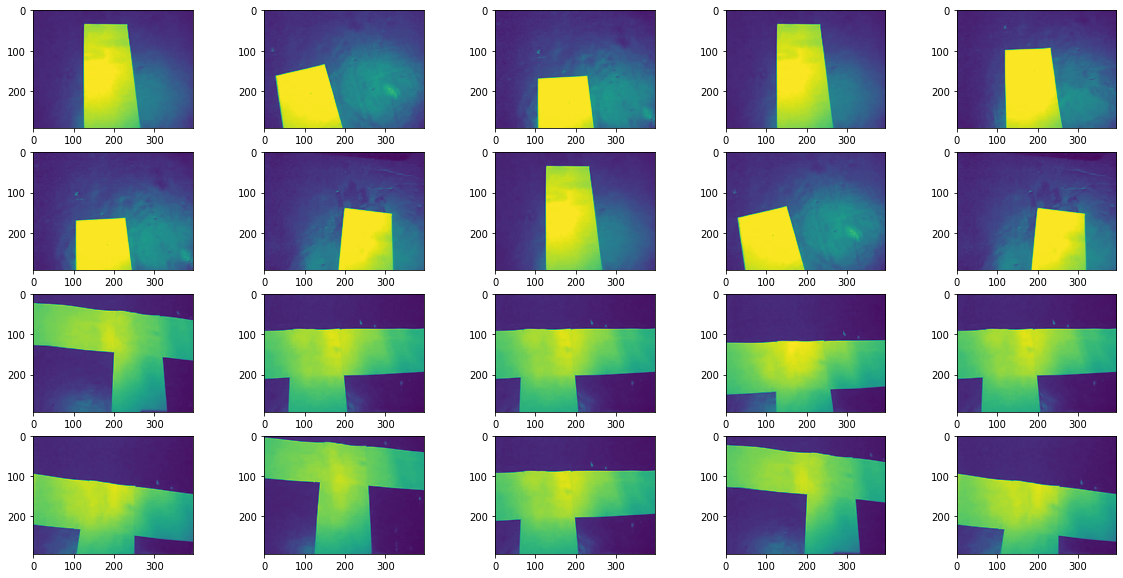

In [ ]:
"""
Image classification with HOG works on grayscale images at the moment
So convert images to grayscale in the range 0-255
"""
image_dataset = image_dataset.gray().uint8()
"""
Display a preview of the captured images
"""
image_dataset.preview(
    samples_per_class=10,
    rows_per_class=2,
    figsize=(20, 10)
)


In [ ]:
"""
Create an image recognition pipeline with HOG feature extractor
"""
from everywhereml.preprocessing.image.object_detection import HogPipeline
from everywhereml.preprocessing.image.transform import Resize

pipeline = HogPipeline(
    transforms=[
        Resize(width=160, height=120)
    ]
)

# Convert images to feature vectors
feature_dataset = pipeline.fit_transform(image_dataset)
feature_dataset.describe()

HOG: 100%|██████████| 98/98 [00:04<00:00, 20.10it/s]


,hog0,hog1,hog2,hog3,hog4,hog5,hog6,hog7,hog8,hog9,...,hog2691,hog2692,hog2693,hog2694,hog2695,hog2696,hog2697,hog2698,hog2699,target
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.100261,0.110394,0.134477,0.253853,0.525060,0.459129,0.344808,0.303262,0.303383,0.228455,...,0.002689,0.002332,0.002054,0.006723,0.055060,0.038740,0.083744,0.084828,0.106064,2.010204
std,0.143454,0.164678,0.133576,0.246499,0.323384,0.322712,0.288846,0.270902,0.283571,0.207317,...,0.005521,0.008020,0.004338,0.018106,0.045843,0.044625,0.058285,0.077186,0.071807,1.488754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000179,0.000000,0.000000
25%,0.000000,0.002035,0.018636,0.059933,0.219975,0.170331,0.101094,0.083415,0.103659,0.099243,...,0.000000,0.000000,0.000000,0.000000,0.021601,0.008685,0.037398,0.027646,0.055906,1.000000
50%,0.043032,0.060138,0.110372,0.186117,0.508840,0.413793,0.287179,0.252208,0.212621,0.159202,...,0.000000,0.000000,0.000000,0.000000,0.048889,0.026212,0.069557,0.062287,0.093535,2.000000
75%,0.144800,0.135934,0.207133,0.379601,0.828956,0.747976,0.518051,0.455494,0.411584,0.323602,...,0.003314,0.000000,0.001420,0.008587,0.068934,0.048528,0.107366,0.116060,0.127559,3.000000
max,1.000000,1.000000,0.829137,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.032499,0.070548,0.022636,0.160603,0.221760,0.241183,0.279309,0.391045,0.391003,4.000000


In [ ]:
pip install everywhereml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""
Print pipeline description
"""
print(pipeline)

ImagePipeline: HogPipeline
---------
 - Resize(from=(320, 240), to=(160, 120), pixformat=gray)
 > HOG(block_size=8, bins=9, cell_size=3)


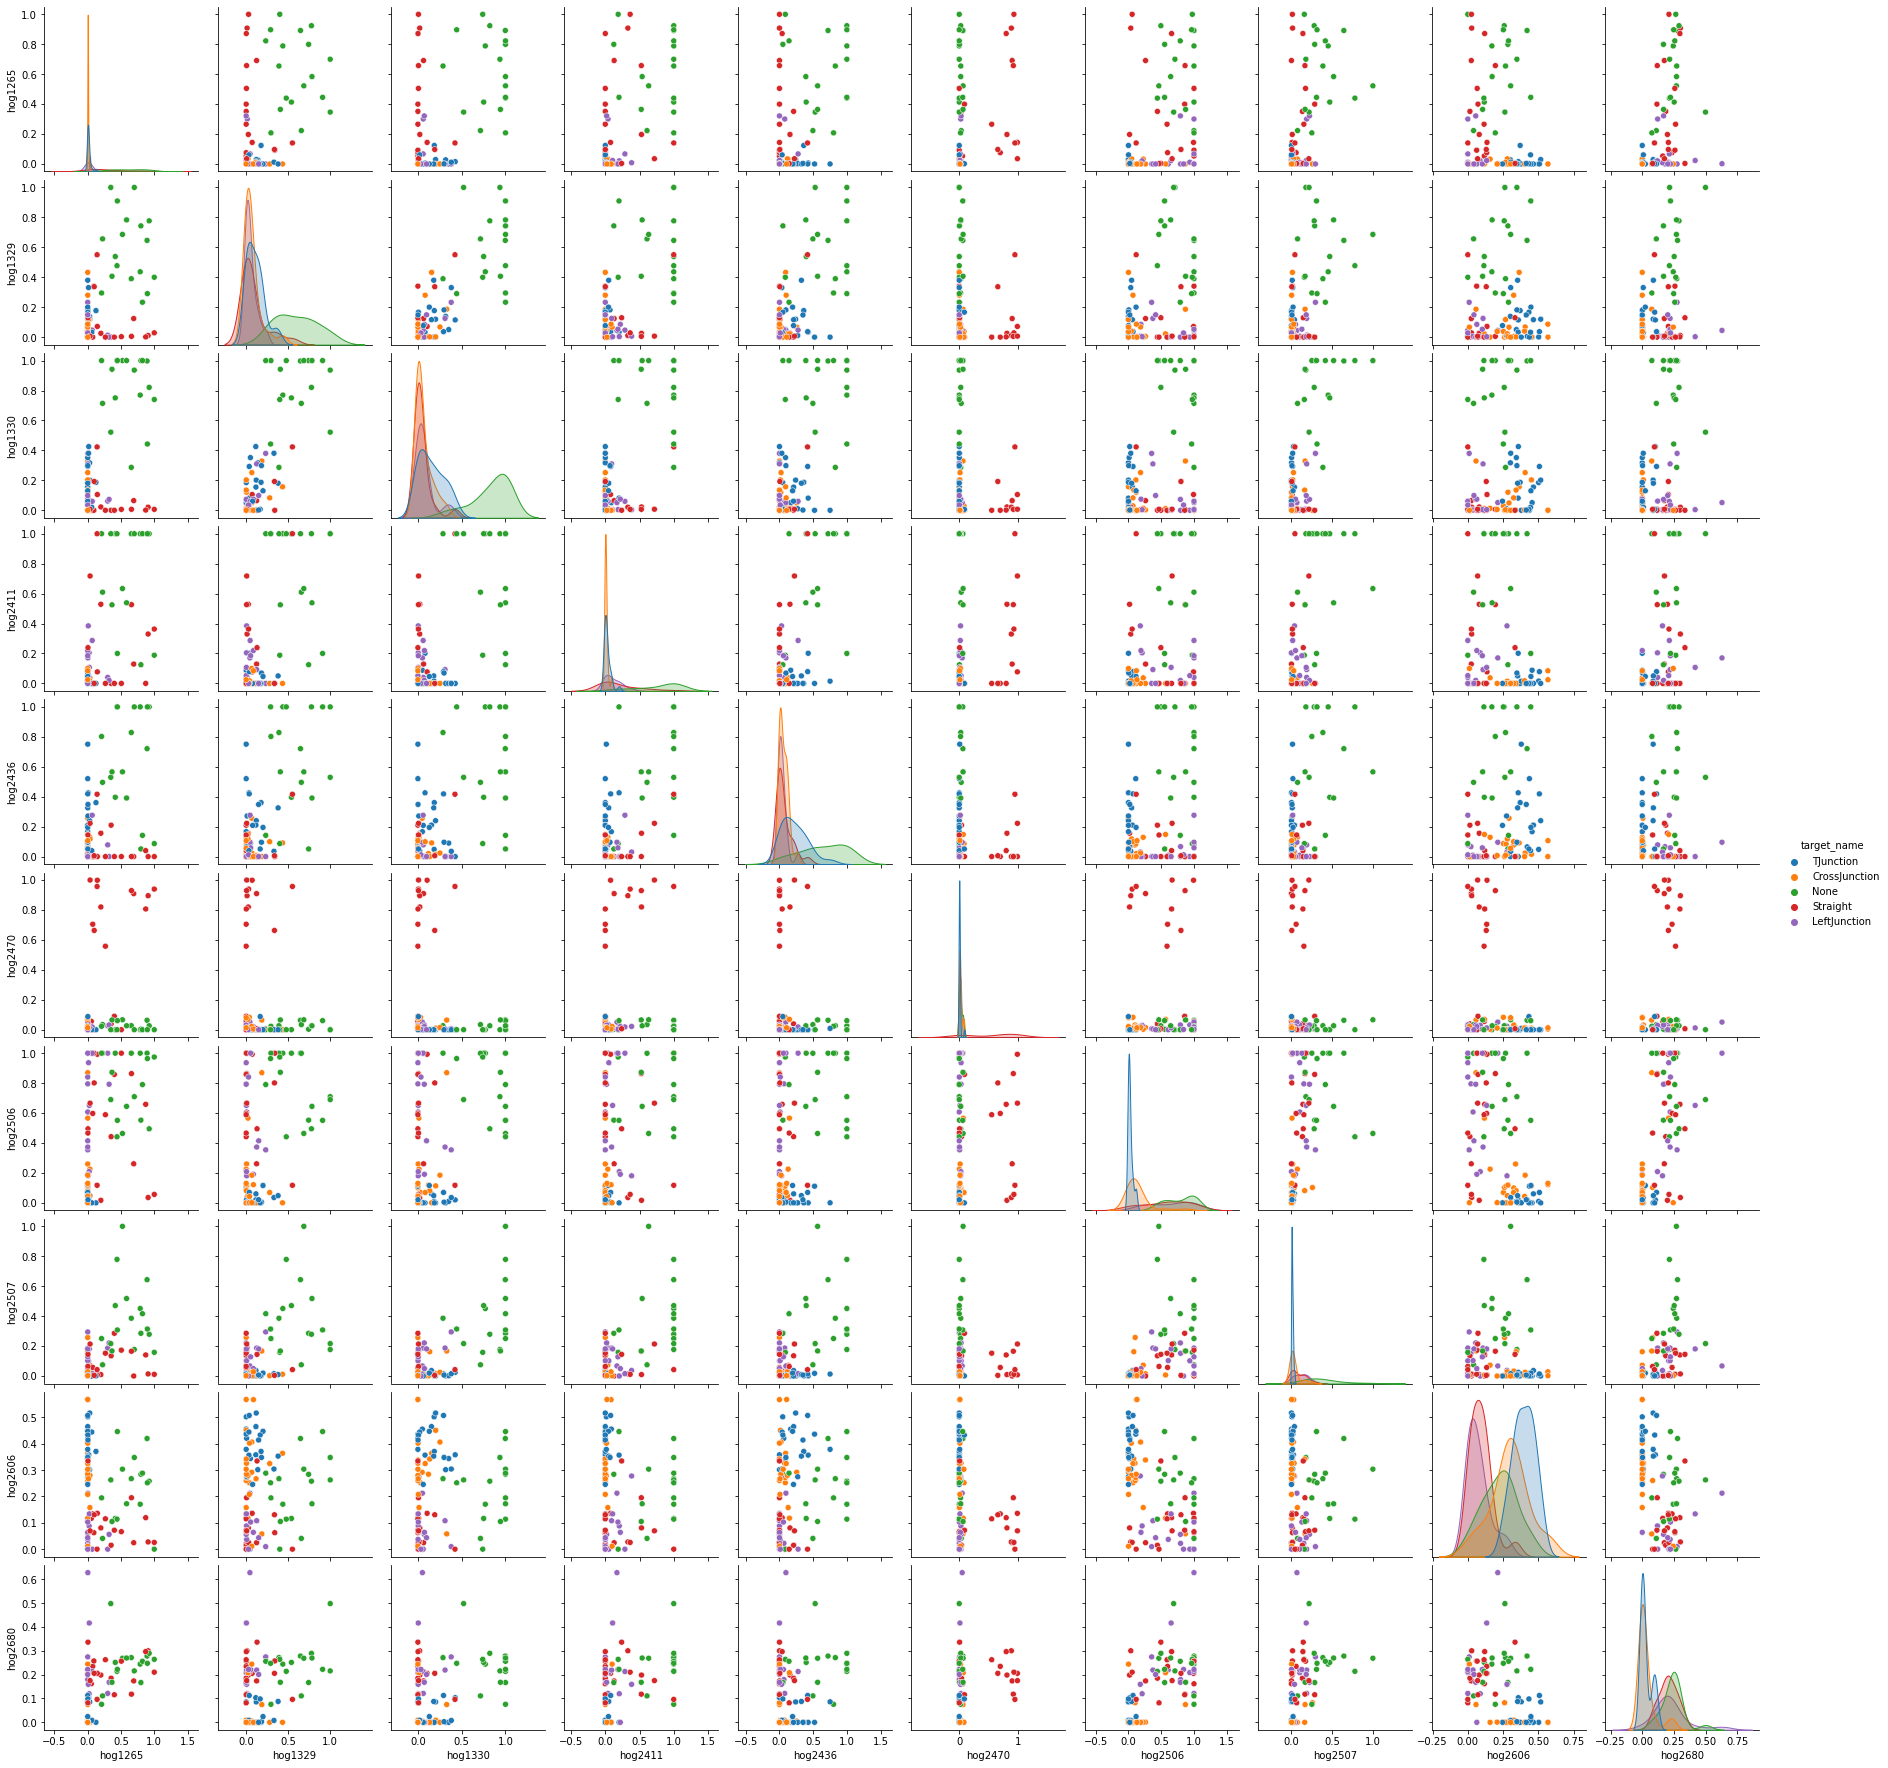

In [ ]:
"""
Plot pairplot of features.
Feel free to open the image in a new window to see it at full scale.
In the next line:
 - n is the number of points to plot (the greater the value, the longer it takes)
 - k is the number of features (values greater than 10 become messy)
"""
feature_dataset.plot.features_pairplot(n=98, k=10)

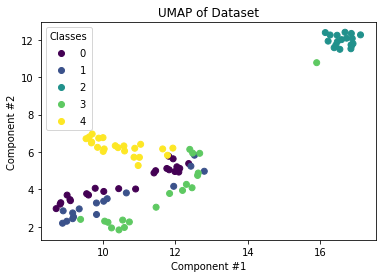

In [ ]:
"""
Plot UMAP of features
If features are discriminative, we should see well defined clusters of points
"""
feature_dataset.plot.umap()